In [1]:
import pandas as pd
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2023-09-27 17:44:37.568643: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-27 17:44:37.568662: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


local_logs/MNIST/CKA-(-1)-Random-All-0.5/evaluate/acc_25clients_1clusters.csv
1250
local_logs/MNIST/CKA-(-1)-HC-All-0.5/evaluate/acc_25clients_10clusters.csv
1250
local_logs/MNIST/weights-(-1)-HC-All-0.5/evaluate/acc_25clients_10clusters.csv
1250


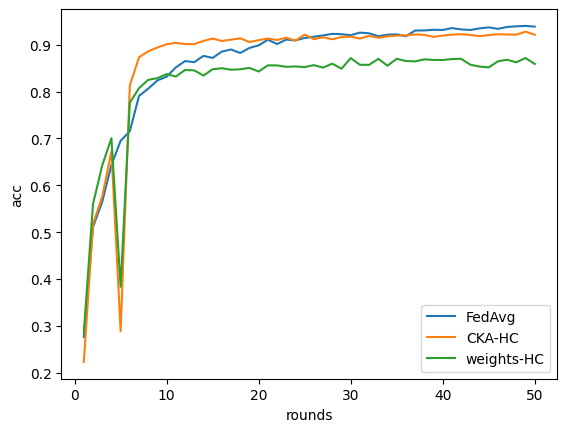

In [51]:
#comparando o numero de clusters

metric = 'weights'
selection = 'All'
n_clust = 10
method = 'HC'

files = {'FedAvg':      f'local_logs/MNIST/CKA-(-1)-Random-All-0.5/evaluate/acc_25clients_1clusters.csv',
         'CKA-HC':      f'local_logs/MNIST/CKA-(-1)-HC-{selection}-0.5/evaluate/acc_25clients_{n_clust}clusters.csv',
         f'{metric}-{method}':  f'local_logs/MNIST/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_25clients_{n_clust}clusters.csv' }

solucoes = ['FedAvg','CKA-HC', f'{metric}-{method}']

for sol in solucoes:
    print(files[sol])

    clust_path = 'local_logs/MNIST/{metric}-(-1)-{method}-POC-0.5/clusters_25clients_{n_clust}clusters.txt'


    acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
    print(len(acc))

    sns.lineplot(acc.groupby('rounds').mean(), y = 'acc', x = 'rounds',
                   label=sol)
